# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kargil
Processing Record 2 of Set 1 | bitam
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | cherskiy
Processing Record 5 of Set 1 | waw
Processing Record 6 of Set 1 | lompoc
Processing Record 7 of Set 1 | olafsvik
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | lodwar
Processing Record 11 of Set 1 | rundu
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | sulangan
Processing Record 14 of Set 1 | shakawe
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | preobrazheniye
Processing Record 17 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | dauriya
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | vanimo
Processing Record 22 of Set 1 | vostok
Proces

Processing Record 38 of Set 4 | dasoguz
Processing Record 39 of Set 4 | morros
Processing Record 40 of Set 4 | provideniya
Processing Record 41 of Set 4 | satitoa
City not found. Skipping...
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | casimiro castillo
Processing Record 44 of Set 4 | odesskoye
Processing Record 45 of Set 4 | mount darwin
Processing Record 46 of Set 4 | viligili
City not found. Skipping...
Processing Record 47 of Set 4 | carnarvon
Processing Record 48 of Set 4 | bubaque
Processing Record 49 of Set 4 | show low
Processing Record 0 of Set 5 | esperance
Processing Record 1 of Set 5 | petatlan
Processing Record 2 of Set 5 | pedasi
Processing Record 3 of Set 5 | omboue
Processing Record 4 of Set 5 | beyla
Processing Record 5 of Set 5 | yarada
Processing Record 6 of Set 5 | edd
Processing Record 7 of Set 5 | kharp
Processing Record 8 of Set 5 | faya
Processing Record 9 of Set 5 | lagoa
Processing Record 10 of Set 5 | constitucion
Processing Recor

Processing Record 27 of Set 8 | havelock
Processing Record 28 of Set 8 | sangar
Processing Record 29 of Set 8 | jalu
Processing Record 30 of Set 8 | korla
Processing Record 31 of Set 8 | wajima
Processing Record 32 of Set 8 | astana
Processing Record 33 of Set 8 | kawalu
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | guaymas
Processing Record 36 of Set 8 | inhambane
Processing Record 37 of Set 8 | berdigestyakh
Processing Record 38 of Set 8 | namibe
Processing Record 39 of Set 8 | gamba
Processing Record 40 of Set 8 | sohag
Processing Record 41 of Set 8 | gizo
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | husavik
Processing Record 44 of Set 8 | pandan
Processing Record 45 of Set 8 | alihe
Processing Record 46 of Set 8 | senno
Processing Record 47 of Set 8 | hihifo
City not found. Skipping...
Processing Record 48 of Set 8 | den helder
Processing Record 49 of Set 8 | oktyabrskiy
Processing Record 0 of Set 9 | umzimvubu
City n

City not found. Skipping...
Processing Record 18 of Set 12 | iranshahr
Processing Record 19 of Set 12 | meulaboh
Processing Record 20 of Set 12 | arlit
Processing Record 21 of Set 12 | sorong
Processing Record 22 of Set 12 | duluth
Processing Record 23 of Set 12 | haines junction
Processing Record 24 of Set 12 | canutama
Processing Record 25 of Set 12 | catamarca
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | safaga
Processing Record 28 of Set 12 | sobolevo
Processing Record 29 of Set 12 | konstantinovskaya
Processing Record 30 of Set 12 | veselynove
Processing Record 31 of Set 12 | ketchikan
Processing Record 32 of Set 12 | port augusta
Processing Record 33 of Set 12 | saint-paul
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | phetchaburi
Processing Record 36 of Set 12 | puerto baquerizo moreno
Processing Record 37 of Set 12 | saint-georges
Processing Record 38 of Set 12 | vila velha
Processing Record 39 of Set 12 | nkhota

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kargil,34.5667,76.1000,-9.73,93,100,0.28,IN,1677640148
1,bitam,2.0760,11.5007,19.39,99,96,1.24,GA,1677640149
2,ushuaia,-54.8000,-68.3000,5.81,75,0,1.54,AR,1677640149
3,cherskiy,68.7500,161.3000,-34.33,96,100,2.57,RU,1677640150
4,waw,7.7029,27.9953,25.83,47,82,1.44,SS,1677640150


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kargil,34.5667,76.1000,-9.73,93,100,0.28,IN,1677640148
1,bitam,2.0760,11.5007,19.39,99,96,1.24,GA,1677640149
2,ushuaia,-54.8000,-68.3000,5.81,75,0,1.54,AR,1677640149
3,cherskiy,68.7500,161.3000,-34.33,96,100,2.57,RU,1677640150
4,waw,7.7029,27.9953,25.83,47,82,1.44,SS,1677640150


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

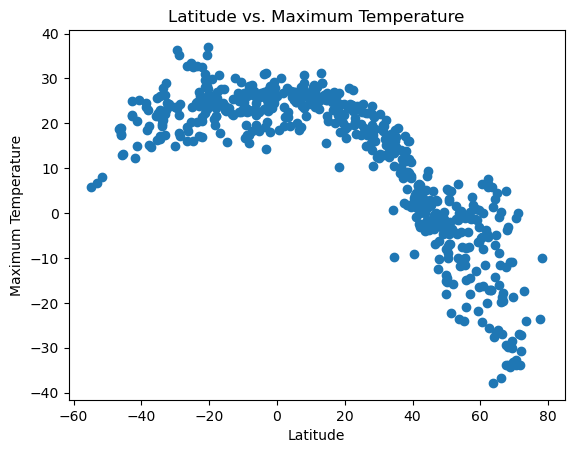

In [8]:
# Build scatter plot for latitude vs. temperature
#city_data_df.plot(kind="scatter", x="Lat", y="Max Temp")
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("Latitude vs. Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

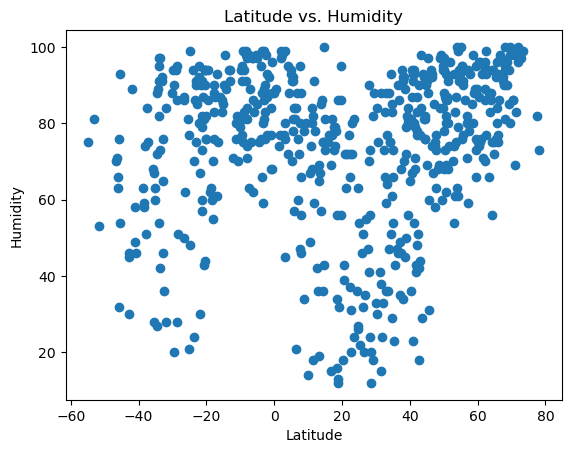

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

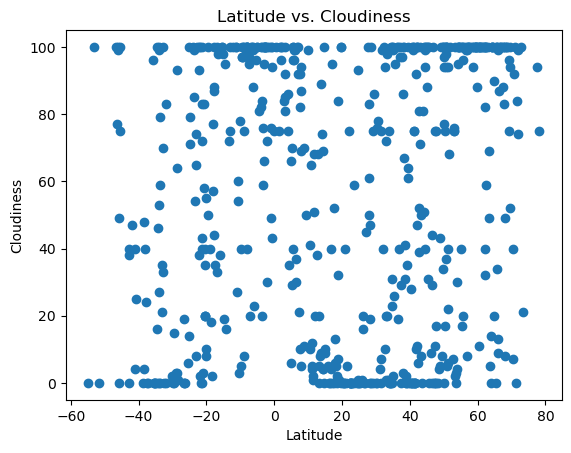

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

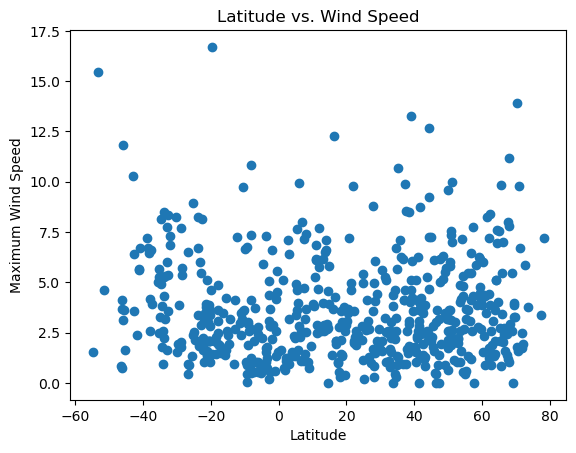

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Maximum Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kargil,34.5667,76.1000,-9.73,93,100,0.28,IN,1677640148
1,bitam,2.0760,11.5007,19.39,99,96,1.24,GA,1677640149
3,cherskiy,68.7500,161.3000,-34.33,96,100,2.57,RU,1677640150
4,waw,7.7029,27.9953,25.83,47,82,1.44,SS,1677640150
5,lompoc,34.6391,-120.4579,10.47,83,100,6.71,US,1677640151


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,5.81,75,0,1.54,AR,1677640149
8,puerto ayora,-0.7393,-90.3518,25.31,96,43,1.34,EC,1677640153
10,rundu,-17.9333,19.7667,21.66,55,77,2.48,NaN,1677640154
13,shakawe,-18.3667,21.8500,19.73,60,2,2.28,BW,1677640155
15,hermanus,-34.4187,19.2345,16.56,89,46,3.80,ZA,1677640158


###  Temperature vs. Latitude Linear Regression Plot

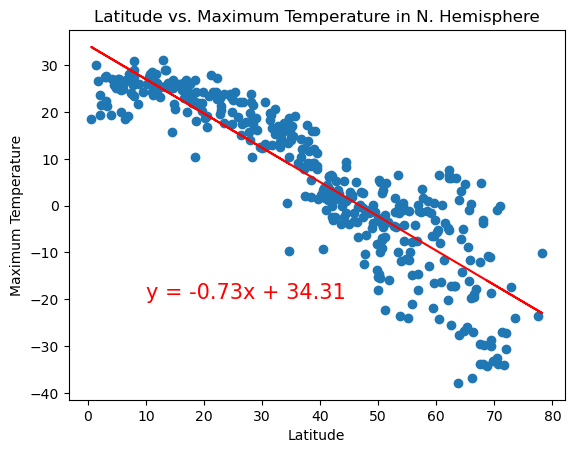

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature in N. Hemisphere")
plt.show()


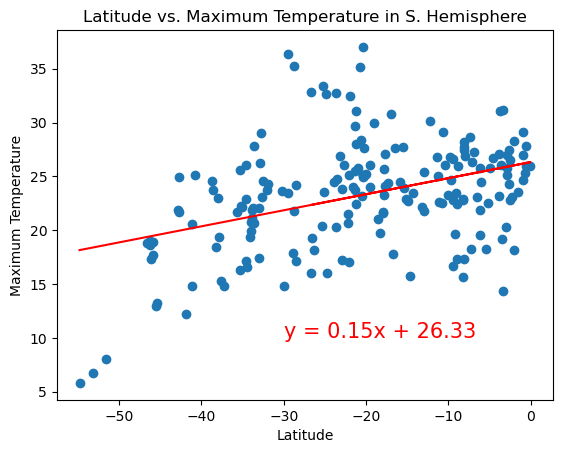

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Latitude vs. Maximum Temperature in S. Hemisphere")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, there is an inverse relationship between maximum temperature and latitude. The larger the latitude gets, or the higher north a location is, the lower the temperature is. The opposite is true in the southern hemisphere. Higher temperatures are associated with higher latitudes, so the farther south a location is the colder it is. 

### Humidity vs. Latitude Linear Regression Plot

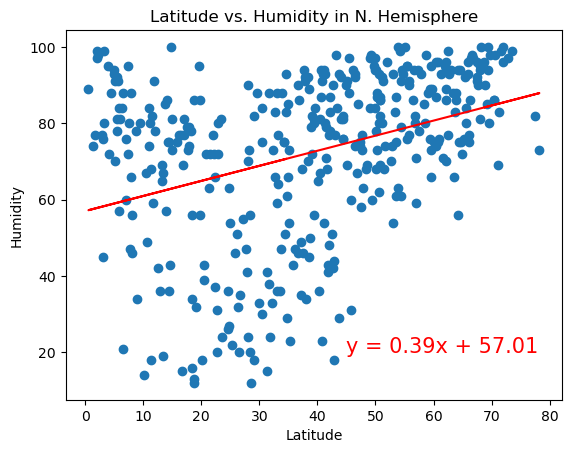

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(45,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in N. Hemisphere")
plt.show()

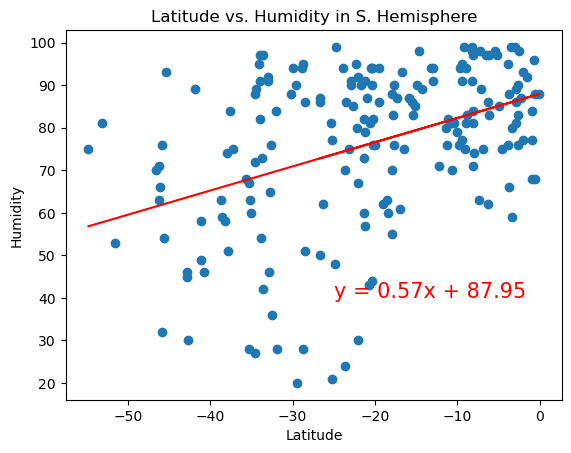

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity in S. Hemisphere")
plt.show()

**Discussion about the linear relationship:** Both hemispheres show have a positive relationship with humidity and latitude. The farther north a location is, the more humid it is. 

### Cloudiness vs. Latitude Linear Regression Plot

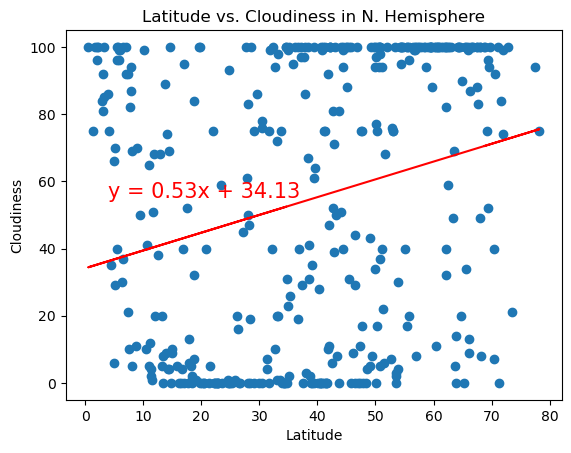

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(4,55),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in N. Hemisphere")
plt.show()

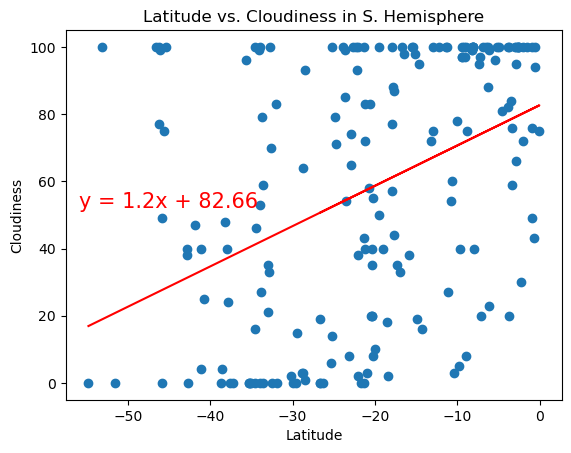

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-56,52),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness in S. Hemisphere")
plt.show()

**Discussion about the linear relationship:** Though the linear regression line for both hemispheres is positive, there doesn't seem to be a strong relationsip between latitude and cloudiness. Locations at lower latitudes can be just as cloud as locations at higher latitudes. 

### Wind Speed vs. Latitude Linear Regression Plot

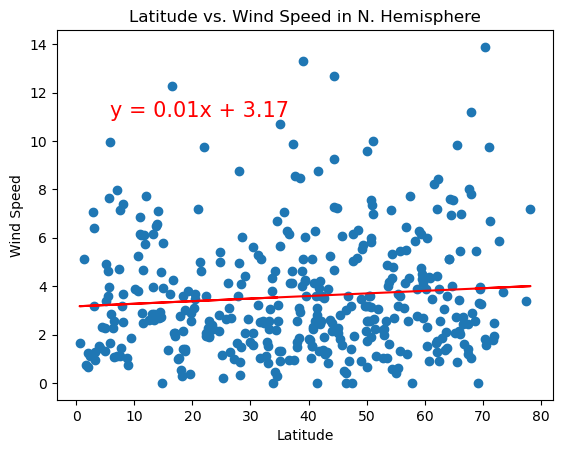

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(5.8,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in N. Hemisphere")
plt.show()

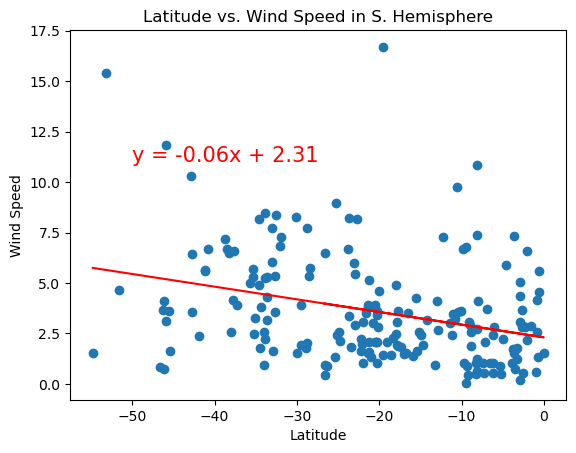

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,11),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed in S. Hemisphere")
plt.show()

**Discussion about the linear relationship:** There doesn't seem to be a strong relationship between latitude and wind speed.